In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
player_trad= pd.read_csv('player_traditional_stats.csv')
player_adv=pd.read_csv('player_advanced_stats.csv')
team_trad=pd.read_csv('team_traditional_stats.csv')
team_adv=pd.read_csv('team_advanced_stats.csv')

In [34]:
player=pd.merge(player_trad, player_adv, on=['nameI', 'teamName'], how='left', suffixes=('_trad', '_adv'))

In [35]:
team=pd.merge(team_trad, team_adv, on=['teamName'], how='inner', suffixes=('_trad', '_adv'))

In [36]:
team['group']= ['gsw_starters', 'gsw_bench', 'uj_starters', 'uj_bench']

In [37]:
team['group']

0    gsw_starters
1       gsw_bench
2     uj_starters
3        uj_bench
Name: group, dtype: object

In [38]:
team= team.drop('startersBench', axis=1)

In [39]:
player = player.loc[:, ~player.T.duplicated()]

In [40]:
cols_drop=['gameId_trad', 'teamId_trad', 'teamCity_trad', 'teamName', 'teamSlug_trad', 'personId_trad', 'firstName_trad',
       'familyName_trad','comment_trad','jerseyNum_trad','playerSlug_trad']
player=player.drop(cols_drop, axis=1)

In [41]:
player=player.rename(columns={'teamTricode_trad':'teamname', 'nameI':'playername', 'minutes_trad':'minutes'})
player=player.rename(columns=str.lower)

In [42]:
team=team.rename(columns=str.lower)

In [43]:
player['minutes'].str.contains("NaN")
player=player[player['minutes'].notna()].reset_index(drop=True)

In [48]:
team.columns

Index(['gameid_trad', 'teamid_trad', 'teamcity_trad', 'teamname',
       'teamtricode_trad', 'teamslug_trad', 'minutes_trad', 'fieldgoalsmade',
       'fieldgoalsattempted', 'fieldgoalspercentage', 'threepointersmade',
       'threepointersattempted', 'threepointerspercentage', 'freethrowsmade',
       'freethrowsattempted', 'freethrowspercentage', 'reboundsoffensive',
       'reboundsdefensive', 'reboundstotal', 'assists', 'steals', 'blocks',
       'turnovers', 'foulspersonal', 'points', 'gameid_adv', 'teamid_adv',
       'teamcity_adv', 'teamtricode_adv', 'teamslug_adv', 'minutes_adv',
       'estimatedoffensiverating', 'offensiverating',
       'estimateddefensiverating', 'defensiverating', 'estimatednetrating',
       'netrating', 'assistpercentage', 'assisttoturnover', 'assistratio',
       'offensivereboundpercentage', 'defensivereboundpercentage',
       'reboundpercentage', 'estimatedteamturnoverpercentage', 'turnoverratio',
       'effectivefieldgoalpercentage', 'trueshooting

In [93]:
player.columns

Index(['teamname', 'playername', 'position_trad', 'minutes', 'fieldgoalsmade',
       'fieldgoalsattempted', 'fieldgoalspercentage', 'threepointersmade',
       'threepointersattempted', 'threepointerspercentage', 'freethrowsmade',
       'freethrowsattempted', 'freethrowspercentage', 'reboundsoffensive',
       'reboundsdefensive', 'reboundstotal', 'assists', 'steals', 'blocks',
       'turnovers', 'foulspersonal', 'points', 'plusminuspoints',
       'estimatedoffensiverating', 'estimateddefensiverating',
       'estimatednetrating', 'assistpercentage', 'assisttoturnover',
       'assistratio', 'offensivereboundpercentage',
       'defensivereboundpercentage', 'reboundpercentage', 'turnoverratio',
       'effectivefieldgoalpercentage', 'trueshootingpercentage',
       'usagepercentage', 'estimatedpace', 'paceper40', 'possessions', 'pie'],
      dtype='object')

In [ ]:
top_scorers=player.loc[player.groupby('teamname')['points'].idxmax()]
print(top_scorers[['teamname','playername','points','fieldgoalsmade','fieldgoalsattempted','threepointersmade','threepointersattempted','freethrowsmade','assists','reboundstotal','turnovers','plusminuspoints']])

   teamname    playername  points  fieldgoalsmade  fieldgoalsattempted  \
4       GSW      S. Curry      31               8                   18   
12      UTA  L. Markkanen      35              15                   27   

    threepointersmade  threepointersattempted  freethrowsmade  assists  \
4                   6                      12               9        5   
12                  2                       8               3        1   

    reboundstotal  turnovers  plusminuspoints  
4               2          2              5.0  
12              6          1             -2.0  


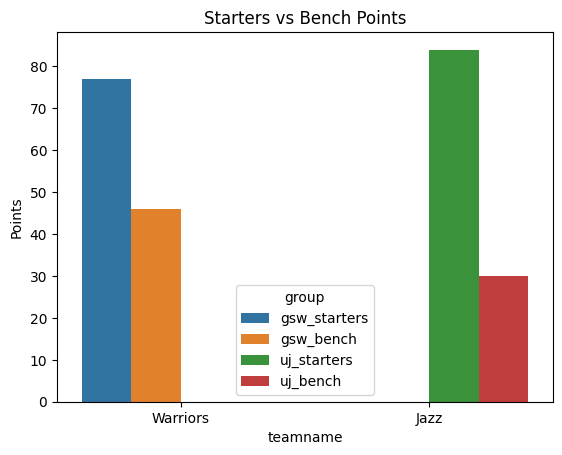

In [47]:
sns.barplot(data=team, x='teamname', y='points',hue='group')
plt.title('Starters vs Bench Points')
plt.ylabel('Points')
plt.show()

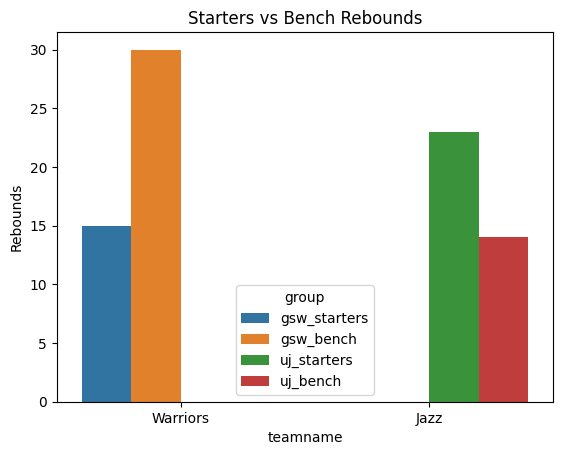

In [77]:
sns.barplot(data=team, x='teamname', y='reboundstotal', hue='group')
plt.title('Starters vs Bench Rebounds')
plt.ylabel('Rebounds')
plt.show()

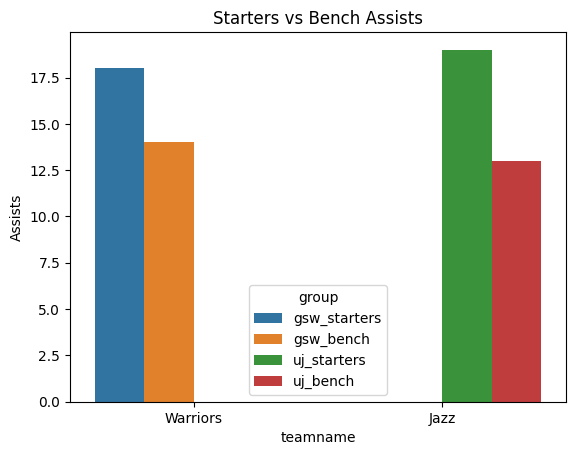

In [82]:
sns.barplot(data=team, x='teamname', y='assists', hue='group')
plt.title('Starters vs Bench Assists')
plt.ylabel('Assists')
plt.show()

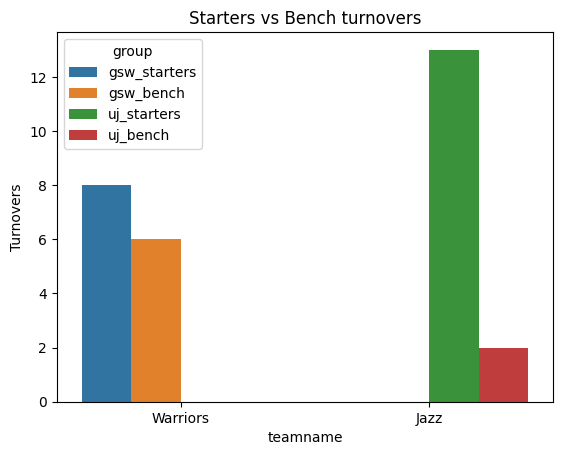

In [ ]:
sns.barplot(data=team, x='teamname', y='turnovers', hue='group')
plt.title('Starters vs Bench turnovers')
plt.ylabel('Turnovers')
plt.show()